### Learn Pandas in 10 minutes

[https://pandas.pydata.org/pandas-docs/stable/10min.html](https://pandas.pydata.org/pandas-docs/stable/10min.html)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Датасет
Мы будем работать с датасетом задержек авиарейсов https://www.kaggle.com/datasets/usdot/flight-delays. Скачайте файлы из этого датасета.

### Чтение данных

`pd.read_csv` считает таблицу в объект типа датафрейм.
При чтении таблицы возникает некий Warning - про него поговорим чуть позже.

`df.head` покажет пять (по умолчанию) верхних строк таблицы:

In [55]:
df = pd.read_csv('sample_data/flights.csv')
df.head()

<ipython-input-55-57bb545140ca>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sample_data/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Из чего состоит таблица

![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png)

Индексация строк/столбцов

![](https://i0.wp.com/sparkbyexamples.com/wp-content/uploads/2021/10/pandas-difference-loc-vs-iloc.png?resize=840%2C353&ssl=1)

Размеры таблицы

In [ ]:
len(df), df.shape

(289800, (289800, 31))

Список названий колонок

In [ ]:
df.columns

Базовая информация по колонкам

In [ ]:
print(df.info(null_counts=True))

Пришло время вспомнить про warning, который возникал при чтении таблицы. Он связан с тем, что данные в таблицы неоднородны по типу. Как одно из побочных явлений - обратите внимание на колонки, в которых по смыслу стоит время. Они при чтении преобразовались в тип float. В результате запись 0005 превратилась в число 5. Чтобы избежать таких проблем, будем считывать данные как строковые переменные:

In [133]:
df = pd.read_csv('sample_data/flights.csv', dtype=str)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Определим колонки с пропущенными значениями

In [ ]:
df.isna().any(axis=0)

Найдем строки, для которых не указано время отправления или прибытия

In [ ]:
df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)

Найдем количество таких строк

In [ ]:
df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1).sum()

и выбросим их

In [ ]:
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]

Пример подсчета уникальных элементов в столбце

In [ ]:
df['AIRLINE'].value_counts()
df.AIRLINE.value_counts()
df.CANCELLED.value_counts()

Плохой пример построения гистограмм по значениям в столбце

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.DEPARTURE_DELAY = df.DEPARTURE_DELAY.astype(float)
df.DEPARTURE_DELAY.hist()
plt.show()

Более показательный график

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.DEPARTURE_DELAY.hist(bins=20, range=(0, 300))
plt.xlabel('Delay (min)')
plt.show()

Базовые статистики

In [ ]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].mean()

In [ ]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].std()

In [ ]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].median()

Создание колонки с датой, вместо трех отдельных колонок

In [ ]:
pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

Создание новой колонки в таблице

In [ ]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df.head()

Пример использования:

In [ ]:
df.loc[df.DATE <= pd.to_datetime('2015-02-14')]

Удалим ненужные более столбцы

In [ ]:
df = df.drop(columns=['YEAR', 'MONTH', 'DAY'])
df.head()

Как поменять порядок столбцов?

In [ ]:
cols = list(df.columns)
cols[-1:] + cols[:-1]

Переместим последний столбец на первое место

In [ ]:
df = df[cols[-1:] + cols[:-1]]
df.head()

Посмотрим на столбец ORIGIN_AIRPORT. В нем много непонятных значений

In [ ]:
df.ORIGIN_AIRPORT.unique()

Как отделить нормальные значения от ненормальных? Например, по длине строки:

In [ ]:
df.ORIGIN_AIRPORT.apply(len)

Фильтруем датасет (комментарий: на практике не нужно доверять признаку длина строки, лучше непосредственно проверять, если ли данная запись в справочнике аэропортов)

In [ ]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) &
            (df.DESTINATION_AIRPORT.apply(len) == 3)]

In [ ]:
df.AIRLINE.unique()

Метод loc позволяет получать срезы датасета. Например, найдем из каких городов летает авиакомпание АА:

In [ ]:
df.loc[df.AIRLINE == 'AA', 'ORIGIN_AIRPORT'].unique()

Также легко найти из каких городов АА делает наибольшее число рейсов

In [ ]:
df.loc[df.AIRLINE == 'AA', 'ORIGIN_AIRPORT'].value_counts()

Иногда вместо таблиц удобно смотреть на графики. У датафрейма и серии есть встроенный метод plot

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.loc[df.AIRLINE == 'AA', 'ORIGIN_AIRPORT'].value_counts()[:10].plot(kind='bar')
plt.show()

Еще один способ как найти перевозчика с наибольшим числом рейсов. Методом groupby

In [ ]:
df.groupby('AIRLINE').size().sort_values()[::-1]

Найдем, сколько времени самолеты каждой авиакомпании проводят в воздухе. Обратите внимание, что сначала строковые значения нужно привести в числовой тип:

In [ ]:
df.AIR_TIME = df.AIR_TIME.astype(float)
df.groupby('AIRLINE')['AIR_TIME'].sum()

Найдем авиакомпанию, у которой больше всего география вылетов (как еще можно решить эту задачу?)

In [ ]:
df.groupby('AIRLINE')['ORIGIN_AIRPORT'].nunique().sort_values()[::-1]

У какой авиакомпании больше всего маршрутов?

In [ ]:
df['ROUTE'] = df['ORIGIN_AIRPORT'] + df['DESTINATION_AIRPORT']
df.groupby('AIRLINE')['ROUTE'].nunique().sort_values()[::-1]

Пора заменить кодовые названия авиакомпаний и аэропортов на полные названия. Для этого нужно соединять таблицы из датасета. Есть как минимум 4 способа это сделать:

![](https://www.tektutorialshub.com/wp-content/uploads/2019/12/Differences-in-inner-and-left-right-and-full-outer-joins.png)

Таблица перевозчиков

In [ ]:
df_air = pd.read_csv('flights/airlines.csv')
df_air.head()

Подготовим левую таблицу

In [ ]:
tmp = df.groupby('AIRLINE')['ROUTE'].nunique().sort_values()[::-1].to_frame().reset_index()
tmp.head()

Сделаем одно необязательное действие по переименованию колонок

In [ ]:
tmp = tmp.rename(columns={'AIRLINE': 'IATA_CODE'})
tmp.head()

Соединим две таблицы по ключу IATA_CODE

In [ ]:
tmp.merge(df_air, on='IATA_CODE')

Теперь поработаем с аэропортами и изобразим на георгрфической карты все маршруты одной из компаний

Считаем таблицу аэропортов

In [ ]:
df_arp = pd.read_csv('flights/airports.csv')
df_arp.head()

Нам потребуется библиотека basemap. Скорее всего, ее придется установить с помощью команды pip install basemap в терминале или в ячейке ноутбука

In [ ]:
!pip install basemap

Отрисуем карту

In [ ]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(15, 10))
land = Basemap(projection='lcc', resolution=None,
               width=15E6, height=8E6,
               lat_0=45, lon_0=-100,)
land.etopo(scale=0.5, alpha=0.9)
plt.show()

Теперь выберем одного перевозчика и все его маршруты:

In [ ]:
routes = df.loc[df.AIRLINE == 'AA', ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']].drop_duplicates()
routes

Нам нужно создать два массива с координатами городом вылета и приземления

In [ ]:
orig = routes[['ORIGIN_AIRPORT']].merge(df_arp,
                                        left_on='ORIGIN_AIRPORT',
                                        right_on='IATA_CODE',
                                        how='left')
dest = routes[['DESTINATION_AIRPORT']].merge(df_arp,
                                             left_on='DESTINATION_AIRPORT',
                                             right_on='IATA_CODE',
                                             how='left')
orig

Чтобы нанести точку с заданной широтой/долготой на карту, георгафические координаты нужно перевести в x, y. Технически, это делается так:
```python
x, y = land(long, lat)```

Практически, это можно реализовать несколькоми способами. Ниже показано два варианта:

In [ ]:
orig_xy = orig[['LONGITUDE', 'LATITUDE']].apply(lambda x: land(*x), axis=1).values
orig_xy = np.stack(orig_xy) #делаем из списка пар координат двумерный массив:
orig_xy

А можно было сделать так

In [ ]:
dest_xy = np.array(land(dest['LONGITUDE'], dest['LATITUDE'])).T
dest_xy

Отрисуем линии на карте:

In [ ]:
fig = plt.figure(figsize=(15, 10))
m = Basemap(projection='lcc', resolution=None,
            width=15E6, height=8E6,
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.9)

for a, b in zip(orig_xy, dest_xy):
    plt.plot([a[0], b[0]], [a[1], b[1]], c='k', lw=1)
plt.show()

Домашнее задание - подготовить отчет для министерства транспорта, раскрывающий характер и особенности задержек авиарейсов. Отчет должен помочь увидеть проблемные точки и способствовать принятию решений. Поэтому стремитесь не констатировать общие факты, а показывать проблемы. Например, сам по себе факт "средняя задержка вылета составляет 15 минут" мало о чем говорит и не помогает понять, из-за чего так происходит. Напротив, график, показывающий, что по понедельникам опоздания возрастают в три раза по сравнению с остальными днями на фоне возрастания числа рейсов и пассажиров, подсказывает возможную причину проблемы: аэропорты не справляются с неравномерной нагрузкой.

Отчет должен быть оформлен в виде ноутбука с четкой структурой. Вначале в ячейке Markdown идет краткое описание исследуемого вопроса (что будем изучать), затем код и все его выводы (таблицы, графики, величины), после этого снова в ячейке Markdown в которой сформулирован ваш краткий вывод.

В отчете должно быть не менее 5 результатов, подтвержденных графиками. Для разнообразия материала используйте различные типы диаграмм. Все графики должны быть снабжены необходимыми подписями (обозначения осей, заголовок, легенда цветовая схема).

Для решения задач используйте методы библиотеки pandas.

№1 здесь посчитаем CANCELLATION_REASON в зависимости от дня недели, а также общее количество отмен в зависимости от дня недели

[nan 'A' 'B' 'C' 'D']


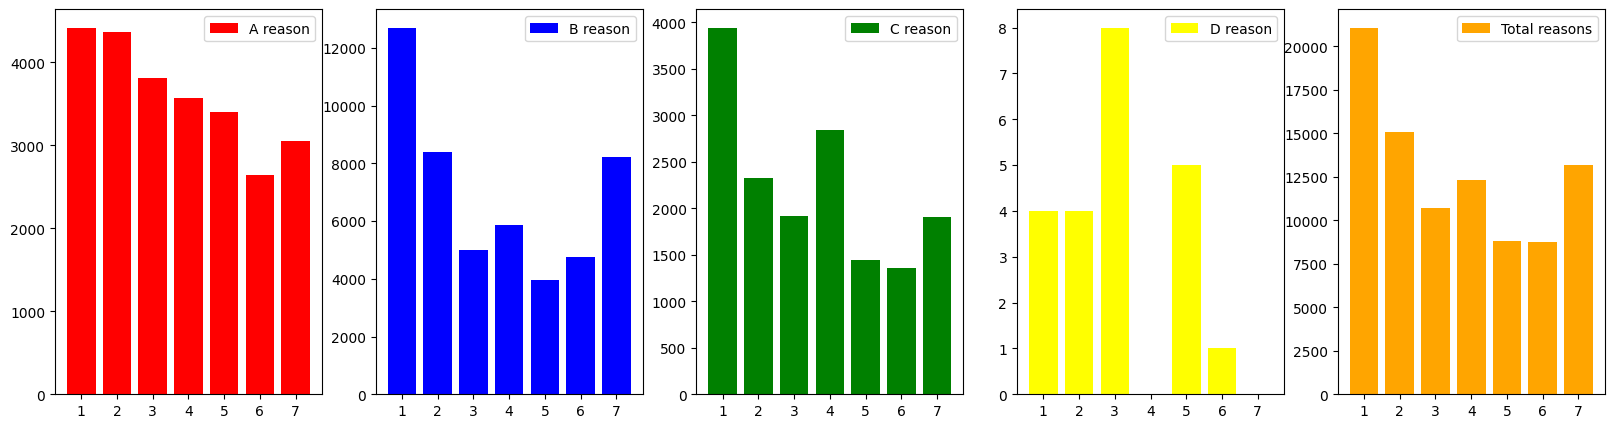

In [73]:
Days = df.DAY_OF_WEEK.unique() #номера дней
Days.sort()
Cancellations_Days = np.zeros(len(Days)) #количество отмен в определенный день
Cancellations_Days_A = np.zeros(len(Days)) #количество отмен по причине A в определенный день
Cancellations_Days_B = np.zeros(len(Days)) #количество отмен по причине B в определенный день
Cancellations_Days_C = np.zeros(len(Days)) #количество отмен по причине C в определенный день
Cancellations_Days_D = np.zeros(len(Days)) #количество отмен по причине D в определенный день
for i in range(0, len(Days)):
  Cancellations_Days_A[i]= len(df[(df['DAY_OF_WEEK'].isin([Days[i]])) & (df['CANCELLATION_REASON'].isin(['A']))])
  Cancellations_Days_B[i] = len(df[(df['DAY_OF_WEEK'].isin([Days[i]])) & (df['CANCELLATION_REASON'].isin(['B']))])
  Cancellations_Days_C[i] = len(df[(df['DAY_OF_WEEK'].isin([Days[i]])) & (df['CANCELLATION_REASON'].isin(['C']))])
  Cancellations_Days_D[i] = len(df[(df['DAY_OF_WEEK'].isin([Days[i]])) & (df['CANCELLATION_REASON'].isin(['D']))])
  Cancellations_Days[i] = Cancellations_Days_A[i]+Cancellations_Days_B[i]+Cancellations_Days_C[i]+Cancellations_Days_D[i]
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 5, 1)
ax1.bar(Days, Cancellations_Days_A, color = 'red', label = 'A reason')
ax1.legend()
plt.xticks(ticks = Days)
ax2 = plt.subplot(1, 5, 2)
ax2.bar(Days, Cancellations_Days_B, color = 'blue', label = 'B reason')
ax2.legend()
plt.xticks(ticks = Days)
ax3 = plt.subplot(1, 5, 3)
ax3.bar(Days, Cancellations_Days_C, color = 'green', label = 'C reason')
ax3.legend()
plt.xticks(ticks = Days)
ax4 = plt.subplot(1, 5, 4)
ax4.bar(Days, Cancellations_Days_D, color = 'yellow', label = 'D reason')
ax4.legend()
plt.xticks(ticks = Days)
ax5 = plt.subplot(1, 5, 5)
ax5.bar(Days, Cancellations_Days, color = 'orange', label = 'Total reasons')
ax5.legend()
plt.xticks(ticks = Days)
plt.show()

Вывод №1 : Благодаря этой пачке графиков можем сделать вывод о том, что чаще всего маршруты отменяются в понедельник, а затем во вторник. Однако частота отмен зависит от причины- разные причины отмены возникают в разные дни.



№2 здесь посчитаем зависимость различных причин отмен от компаний(выведем относительное количество отмен), а также посчитаем общее количество отмен каждой компании

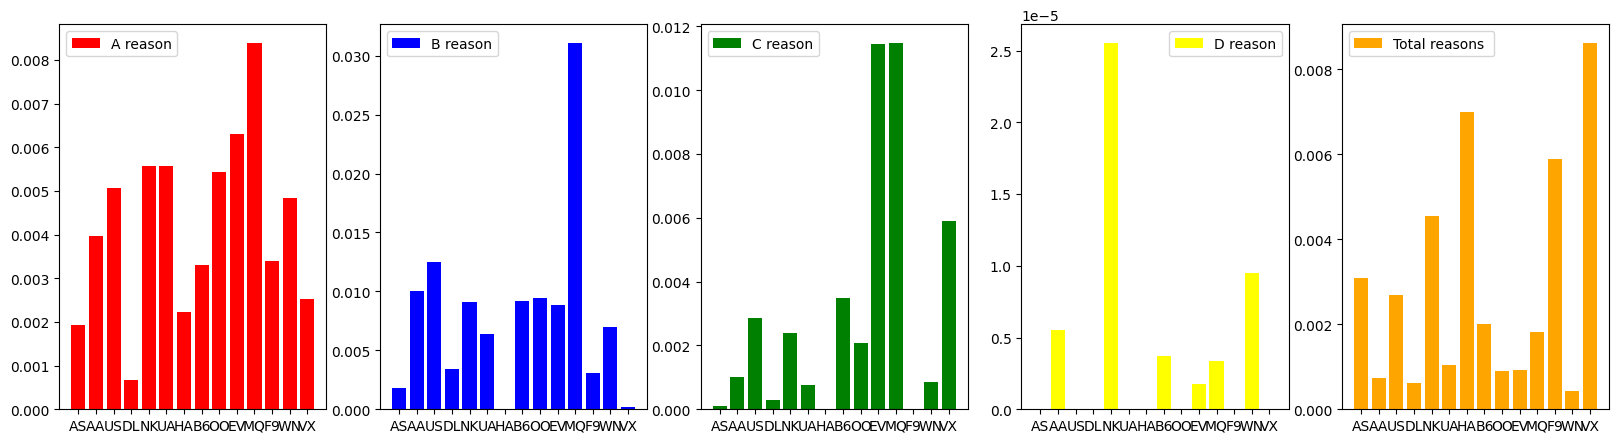

In [57]:
Companies = df.AIRLINE.unique()
Companies_Flights = np.zeros(len(Companies))
Companies_A_Cancellations = np.zeros(len(Companies)) #количество отмен определенной авиакомпании по причине A
Companies_B_Cancellations = np.zeros(len(Companies)) #количество отмен определенной авиакомпании по причине B
Companies_C_Cancellations = np.zeros(len(Companies)) #количество отмен определенной авиакомпании по причине C
Companies_D_Cancellations = np.zeros(len(Companies)) #количество отмен определенной авиакомпании по причине D
Companies_Total_Cancellations = np.zeros(len(Companies)) #количество отмен определенной авиакомпании

for i in range(0, len(Companies)):
  Companies_Flights[i] =len(df[df['AIRLINE'].isin([Companies[i]])])
  Companies_A_Cancellations[i] = len(df[(df['AIRLINE'].isin([Companies[i]])) & (df['CANCELLATION_REASON'].isin(['A']))])
  Companies_B_Cancellations[i] = len(df[(df['AIRLINE'].isin([Companies[i]])) & (df['CANCELLATION_REASON'].isin(['B']))])
  Companies_C_Cancellations[i] = len(df[(df['AIRLINE'].isin([Companies[i]])) & (df['CANCELLATION_REASON'].isin(['C']))])
  Companies_D_Cancellations[i] = len(df[(df['AIRLINE'].isin([Companies[i]])) & (df['CANCELLATION_REASON'].isin(['D']))])
  Companies_Total_Cancellations = Companies_A_Cancellations[i]+Companies_B_Cancellations[i]+Companies_C_Cancellations[i]+Companies_D_Cancellations[i]
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 5, 1)
ax1.bar(Companies, Companies_A_Cancellations/Companies_Flights, color = 'red', label = 'A reason')
ax1.legend()
ax2 = plt.subplot(1, 5, 2)
ax2.bar(Companies, Companies_B_Cancellations/Companies_Flights, color = 'blue', label = 'B reason')
ax2.legend()
ax3 = plt.subplot(1, 5, 3)
ax3.bar(Companies, Companies_C_Cancellations/Companies_Flights, color = 'green', label = 'C reason')
ax3.legend()
ax4 = plt.subplot(1, 5, 4)
ax4.bar(Companies, Companies_D_Cancellations/Companies_Flights, color = 'yellow', label = 'D reason')
ax4.legend()
ax5 = plt.subplot(1, 5, 5)
ax5.bar(Companies, Companies_Total_Cancellations/Companies_Flights, color = 'orange', label = 'Total reasons ')
ax5.legend()
plt.show()

Вывод №2: Благодаря этой пачке графиков, понимаем что чаще всего отменяет рейсы именно компания VX, а значит, если будет необходимость разорвать с какой-то из авиакомпаний контракт, то есть минус у авиакомпании VX - самая ненадежная из представленных

№3 здесь посчитаем diverted в зависимости от дня недели для всех компаний

[0 1]
0


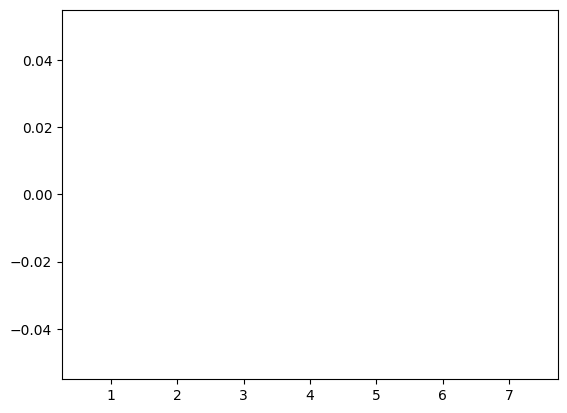

In [63]:
print(df.DIVERTED.unique())
Days = df.DAY_OF_WEEK.unique()
Days_Diverted = np.zeros(len(Days))
Days.sort()
print(len(df[df['DIVERTED']=='1'])) # выводится 0, а значит не было ситуаций, когда маршрут перенесли в другую точку назначения
for i in range(0, len(Days)):
  Days_Diverted[i] = len(df[(df['DAY_OF_WEEK'].isin([Days[i]])) & (df['DIVERTED'].isin(['1']))])
plt.bar(Days, Days_Diverted)
plt.show()

[0 1]


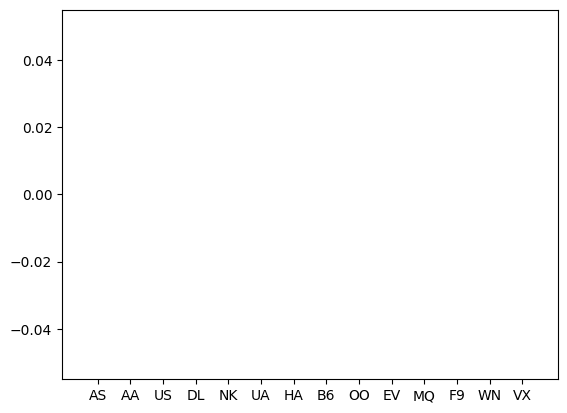

In [64]:
#здесь посчитаем относительное diverted в зависимости от компании
print(df.DIVERTED.unique())
Companies = df.AIRLINE.unique()
Companies_Diverted = np.zeros(len(Companies))
Companies_Flights = np.zeros(len(Companies))
for i in range(0, len(Companies)):
  Companies_Flights[i] =len(df[df['AIRLINE'].isin([Companies[i]])])
  Companies_Diverted[i] = len(df[(df['AIRLINE'].isin([Companies[i]])) & (df['DIVERTED'].isin(['1']))])
plt.bar(Companies, Companies_Diverted/Companies_Flights)
plt.show()

Вывод №3:
В данной таблице DIVERTED не было, но если бы было больше значений, то мы могли бы узнать компанию, которая больше чаще остальных переносила точку назначения, то мы бы отказались от этой *компании*(если нам нужно отказаться от какой-то одной компании)

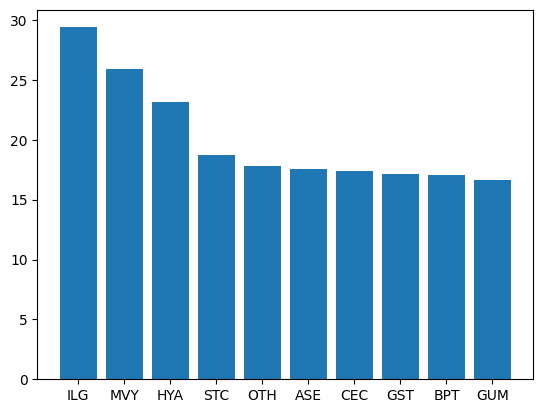

[29.391752577319586, 25.90731707317073, 23.182926829268293, 18.692307692307693, 17.777358490566037, 17.58753799392097, 17.413793103448278, 17.17105263157895, 17.02085620197585, 16.647590361445783]
['ILG', 'MVY', 'HYA', 'STC', 'OTH', 'ASE', 'CEC', 'GST', 'BPT', 'GUM']


In [167]:
from heapq import nlargest
k = 10
#почему-то при считывании df.ORIGIN_AIRPORT.unique() и df.DESTINATION_AIRPORT.unique() еще выводятся очень много строк пятизначных чисел, а почему- интернет ответа не знает
#поэтому здесь и ниже придется сделать костыль и откинуть те значения origin_airport и destination_airport, которые являются числами, записанными в строчном виде
Fake_Origin_Airports = df.ORIGIN_AIRPORT.unique()
Origin_Airports = []
for t in Fake_Origin_Airports:
  if t.isdigit()==False:
    Origin_Airports.append(t)
#костыль окончен
Mean_Departure_Delay = np.zeros(len(Origin_Airports))
Result_Departure_Means = np.zeros(k)
Result_Origin_Airports = ['0']*k
df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].astype( float )
for i in range(0, len(Origin_Airports)):
  Mean_Departure_Delay[i] = df[df['ORIGIN_AIRPORT'].isin([Origin_Airports[i]])].DEPARTURE_DELAY.mean()
Dictionary_Mean_Origin = {Mean_Departure_Delay[s]: Origin_Airports[s] for s in range(0,len(Origin_Airports))}
Result_Departure_Means = nlargest(k, Mean_Departure_Delay)
for j in range(0,k):
  Result_Origin_Airports[j] = Dictionary_Mean_Origin.get(Result_Departure_Means[j])
plt.bar(Result_Origin_Airports, Result_Departure_Means)
plt.show()
print(Result_Departure_Means)
print(Result_Origin_Airports)

Вывод №4: получаем, что хуже всего с отправлением самолетов справляется аэропорт ILG.

№5 здесь посчитаем зависимость arrival_delay в зависимости от destination_airport

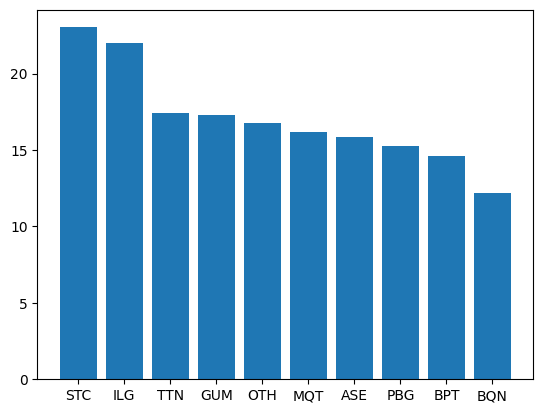

[23.025974025974026, 21.989473684210527, 17.43390076059399, 17.3202416918429, 16.7406015037594, 16.152027027027028, 15.829447852760737, 15.288256227758007, 14.631693989071039, 12.19277108433735]
['STC', 'ILG', 'TTN', 'GUM', 'OTH', 'MQT', 'ASE', 'PBG', 'BPT', 'BQN']


In [168]:
from heapq import nlargest
k = 10
Destination_Airports = df.DESTINATION_AIRPORT.unique()
#начало костыля
Fake_Destination_Airports = df.DESTINATION_AIRPORT.unique()
Destination_Airports = []
for t in Fake_Destination_Airports:
  if t.isdigit()==False:
    Destination_Airports.append(t)
#конец костыля
Mean_Arrival_Delay = np.zeros(len(Destination_Airports))
Result_Arrival_Means = np.zeros(k)
Result_Arrival_Airports = ['0']*k
df['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].astype( float )
for i in range(0, len(Destination_Airports)):
  Mean_Arrival_Delay[i] = df[df['DESTINATION_AIRPORT'].isin([Destination_Airports[i]])].ARRIVAL_DELAY.mean()
Dictionary_Mean_Destination = {Mean_Arrival_Delay[s]: Destination_Airports[s] for s in range(0,len(Destination_Airports))}
Result_Arrival_Means = nlargest(k, Mean_Arrival_Delay)
for j in range(0,k):
  Result_Arrival_Airports[j] = Dictionary_Mean_Destination.get(Result_Arrival_Means[j])
plt.bar(Result_Arrival_Airports, Result_Arrival_Means)
plt.show()
print(Result_Arrival_Means)
print(Result_Arrival_Airports)

Вывод №5:
Получаем, что хуже всего с приемом самолетов справляется аэропорт STC